### NLP and MultinomialNB Model - Get query index by passing movit title 

In [1]:
# From pevious pipeline we have created movie_user_rating_index.csv
# We will use that csv here to get index for movie title

In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
import pickle
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Jagadheeswar
[nltk_data]     Reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Load movie_user_rating_index.csv
movie_user_rating_index=pd.read_csv("movie_user_rating_index.csv",encoding='utf-8',compression='gzip') 
movie_user_rating_index

,index,title
0,0,10 cloverfield lane
1,1,12 years a slave
2,2,22 jump street
3,3,about time
4,4,american hustle
...,...,...
107,107,world war z
108,108,"world's end, the"
109,109,x-men: apocalypse
110,110,x-men: days of future past


In [4]:
# By mistakenly model was trained with one NAN value with movie title
# Anyway no problem we will remove this NAN and train NLP model
# Check summary of null values
movie_user_rating_index.isnull().sum()

index    0
title    0
dtype: int64

In [5]:
# we have only one null value,just remove this
movie_user_rating_index.dropna(inplace=True)
movie_user_rating_index.isnull().sum()

index    0
title    0
dtype: int64

In [6]:
# check shape of movie_user_rating_index
movie_user_rating_index.shape

(112, 2)

In [7]:
#remove special characters 
movie_user_rating_index['clean_title'] = movie_user_rating_index['title'].str.replace("[^0-9a-zA-Z#]", " ")
#lowercase all characters
movie_user_rating_index['clean_title'] = movie_user_rating_index['clean_title'].fillna('').apply(lambda x: x.lower())
movie_user_rating_index

,index,title,clean_title
0,0,10 cloverfield lane,10 cloverfield lane
1,1,12 years a slave,12 years a slave
2,2,22 jump street,22 jump street
3,3,about time,about time
4,4,american hustle,american hustle
...,...,...,...
107,107,world war z,world war z
108,108,"world's end, the",world s end the
109,109,x-men: apocalypse,x men apocalypse
110,110,x-men: days of future past,x men days of future past


In [8]:
len(movie_user_rating_index)

112

In [9]:
# tokenization - get all words from all movie titles
tokenized_doc = movie_user_rating_index['clean_title'].fillna('').apply(lambda x: x.split())
# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
# de-tokenization
detokenized_doc = []
 # start from 1 and ends with length + 1 as move removed NAN from title 
 # it supposed to be like for i in range(0,len(movie_user_rating_index)):
for i in range(0,len(movie_user_rating_index)):
        t = " ".join(tokenized_doc[i])
        detokenized_doc.append(t)
movie_user_rating_index['clean_title'] = detokenized_doc



In [10]:
len(tokenized_doc)

112

In [11]:
movie_user_rating_index

,index,title,clean_title
0,0,10 cloverfield lane,10 cloverfield lane
1,1,12 years a slave,12 years slave
2,2,22 jump street,22 jump street
3,3,about time,time
4,4,american hustle,american hustle
...,...,...,...
107,107,world war z,world war z
108,108,"world's end, the",world end
109,109,x-men: apocalypse,x men apocalypse
110,110,x-men: days of future past,x men days future past


#### Words frequency Visualization

In [12]:
# combine all movie titles into singel string with help of concat with space " "
title = movie_user_rating_index.clean_title.str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(title)
vocabulary = set(tokens)
print("Total tokens = {0}".format(len(tokens)))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)

Total tokens = 243


['man',
 '2',
 'world',
 'star',
 'captain',
 'hunger',
 'games',
 'street',
 'american',
 'dawn',
 'big',
 'runner',
 'america',
 'war',
 'game',
 'fury',
 'guardians',
 'galaxy',
 'hobbit',
 'secret',
 'la',
 'rogue',
 'wars',
 'trek',
 'spider',
 'mockingjay',
 'part',
 'end',
 'thor',
 'x',
 'men',
 '10',
 'cloverfield',
 'lane',
 '12',
 'years',
 'slave',
 '22',
 'jump',
 'time',
 'hustle',
 'sniper',
 'ant',
 'arrival',
 'avengers',
 'age',
 'ultron',
 'baby',
 'driver',
 'batman',
 'v',
 'superman',
 'justice',
 'hero',
 '6',
 'short',
 'blade',
 '2049',
 'boyhood',
 'bridge',
 'spies',
 'civil',
 'winter',
 'soldier',
 'phillips',
 'chappie',
 'conjuring',
 'dallas',
 'buyers',
 'club',
 'planet',
 'apes',
 'deadpool',
 'despicable',
 'divergent',
 'doctor',
 'strange',
 'dunkirk',
 'edge',
 'tomorrow',
 'elysium',
 'ender',
 'ex',
 'machina',
 'fantastic',
 'beasts',
 'find',
 'finding',
 'dory',
 'frozen',
 'get',
 'godzilla',
 'gone',
 'girl',
 'grand',
 'budapest',
 'hotel'

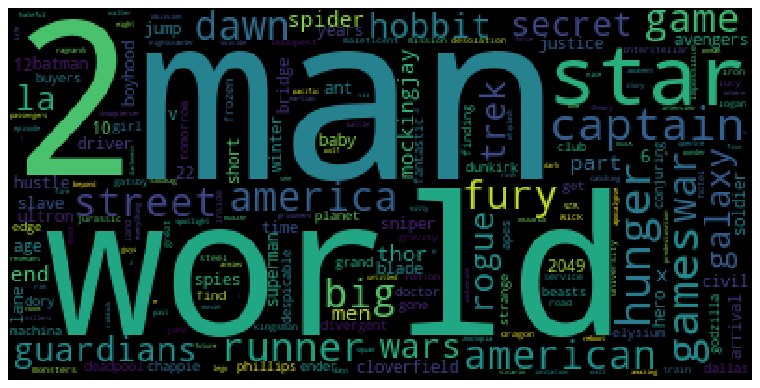

In [13]:
from wordcloud import WordCloud
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### Create MultinomialNB model

In [14]:
# movie title is input and index is output
X_train = movie_user_rating_index.clean_title.values
y_train = movie_user_rating_index.index.values


In [15]:
# To train model, all data should be numbers
# X_train is list of title ie these words shoud be converted to numbers with help of bag of words or TFIDF
# Y_train is already numbers so we dont need to convert them
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
print(train_vectors.shape)

(112, 186)


In [16]:
# create and train the model
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(train_vectors, y_train)

In [17]:
# Testig the model by passing some title and validate index like accuracy
X_test = movie_user_rating_index.loc[:20, 'title'].values
y_test = movie_user_rating_index.loc[:20, 'index'].values
test_vectors = vectorizer.transform(X_test)

In [18]:
# accuracy score 1.0 ie our model will predict correct index for movie title
from  sklearn.metrics  import accuracy_score
predicted = classifier.predict(test_vectors)
print(accuracy_score(y_test,predicted))

1.0


#### Manual Tesing

In [19]:
# display last records
movie_user_rating_index.tail(10)

,index,title,clean_title
102,102,we're the millers,millers
103,103,whiplash,whiplash
104,104,"wolf of wall street, the",wolf wall street
105,105,"wolverine, the",wolverine
106,106,wonder woman,wonder woman
107,107,world war z,world war z
108,108,"world's end, the",world end
109,109,x-men: apocalypse,x men apocalypse
110,110,x-men: days of future past,x men days future past
111,111,zootopia,zootopia


In [20]:
# Pass movie name and check index predicted correctly or not
#name=" III Rambo"
#name="zero dark thirty"
#test_vector= vectorizer.transform([name])
#predicted = classifier.predict(test_vector)
#print("{0} : {1}".format(predicted[0], movie_user_rating_index.title[predicted[0]]))

In [21]:
# Load KNN model
model_knn = pickle.load( open( "collaborativeFiltering_model.pkl", "rb" ) )

In [22]:
# load movie_user_rating_index.csv
movie_features_index_df=pd.read_csv("movie_user_rating_index.csv",encoding ='utf-8',compression='gzip')

In [23]:
# Load pivot test table  - used 10 movies data for testing
movie_user_rating_pivottable=pd.read_csv("movie_user_rating_pivottable_test.csv",encoding ='utf-8',compression='gzip')

In [24]:
# Pass index and get similar movies
def getRecomendedMoviesByIndex(queryIndex,numOfMovies):
    distances, indices = model_knn.kneighbors(movie_user_rating_pivottable.iloc[queryIndex,:].values.reshape(1, -1), n_neighbors = numOfMovies)
    return distances,indices

In [25]:
# Pass movie name and get index
def getMovieIndex(name):
    name=name.strip().lower()
    test_vector= vectorizer.transform([name])
    predicted = classifier.predict(test_vector)
    print("{0} : {1}".format(predicted[0], movie_features_index_df.title[predicted[0]]))
    return predicted[0]

In [26]:
# Pass movie name and get similar movies
def recommendedMovies(name,numOfMovies=5):
    movieList=list()
    query_index=getMovieIndex(name)
    print(query_index)
    distances, indices =getRecomendedMoviesByIndex(query_index,numOfMovies)
    for i in range(0, len(distances.flatten())):
        movieList.append(movie_features_index_df.title[indices.flatten()[i]])
    return movieList

In [27]:
recommendedMovies("10 000 bc" ,5)

0 : 10 cloverfield lane 
0


['10 cloverfield lane ',
 'arrival ',
 'get out ',
 'ex machina ',
 'nightcrawler ']

In [28]:
# save the MultinomialNB classifier model
fileName="collaborativeFiltering_NLP_model.pkl"
pickle.dump(classifier,open(fileName,'wb'))

In [29]:
# save the vectorizer classifier model
fileName="collaborativeFiltering_NLP_vectorizer.pkl"
pickle.dump(vectorizer, open(fileName, "wb")) 

In [30]:
# dont need this csv file
# save trained vectorizer
#trained_vectorizer = movie_user_rating_index.clean_title.values
#trained_vectorizer_df = pd.DataFrame({'trained_vectorizer': trained_vectorizer})

#trained_vectorizer_df.to_csv('trained_vectorizer.csv', index=False,encoding='utf-8') 